In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dehradun.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Doon Darbar,500,"North Indian,Mughlai",Dehradun,Paltan Bazaar,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.2,1026
1,Gaylord Xpress,200,Fast Food,Dehradun,Paltan Bazaar,Quick Bites,10am to 12midnight(Mon-Sun),Good,3.9,627
2,Mannu Fast Food,250,"Fast Food,North Indian,Chinese",Dehradun,Raipur,Quick Bites,8am to 11pm(Mon-Sun),Very Good,4.3,321
3,Walk In Woods,800,"North Indian,Pizza,Chinese,Mughlai",Dehradun,Chironwali,Casual Dining,10am to 11pm(Mon-Sun),Very Good,4.3,405
4,Burger King,500,"Burger,Fast Food",Dehradun,Pacific Mall-- Jakhan,Quick Bites,11am to 11pm(Mon-Sun),Very Good,4.1,324


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
Name                564 non-null object
Price               564 non-null int64
Cuisine_Category    563 non-null object
City                564 non-null object
Region              564 non-null object
Cuisine_Type        564 non-null object
Timing              562 non-null object
Rating_Types        564 non-null object
Rating              564 non-null float64
Votes               564 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 44.1+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,564.000000,564.000000,564.000000
mean,476.718085,3.472695,61.184397
std,303.691574,0.415763,99.690256
min,0.000000,2.300000,4.000000
25%,250.000000,3.200000,10.000000
50%,400.000000,3.500000,26.000000
75%,600.000000,3.800000,70.250000
max,2000.000000,4.700000,1026.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    1
City                0
Region              0
Cuisine_Type        0
Timing              2
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Pizza Italia                      3
Standard Bakers & Fast Food       3
Bikanervala                       2
Lemon Chilli Family Restaurant    2
Giani                             2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Jakhan                  52
Race Course             44
Hathibarkala Salwala    42
Karanpur                37
Dharampur               36
Malsi                   33
Balliwala               31
Chukkuwala              30
Paltan Bazaar           30
Ballupur                30
Name: Region, dtype: int64

Text(0.5,1,'Region')

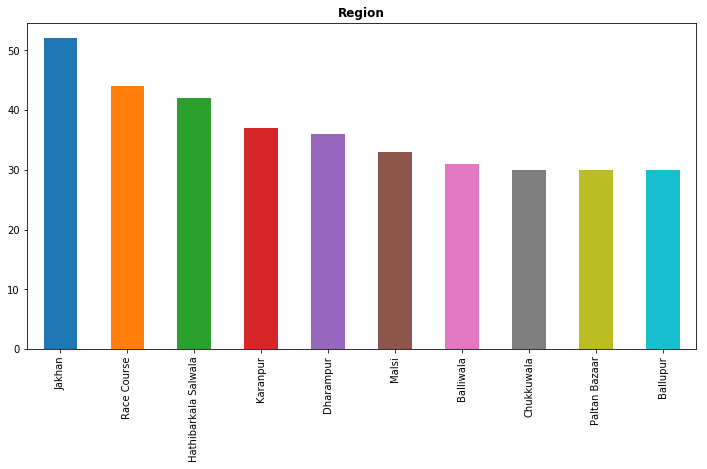

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

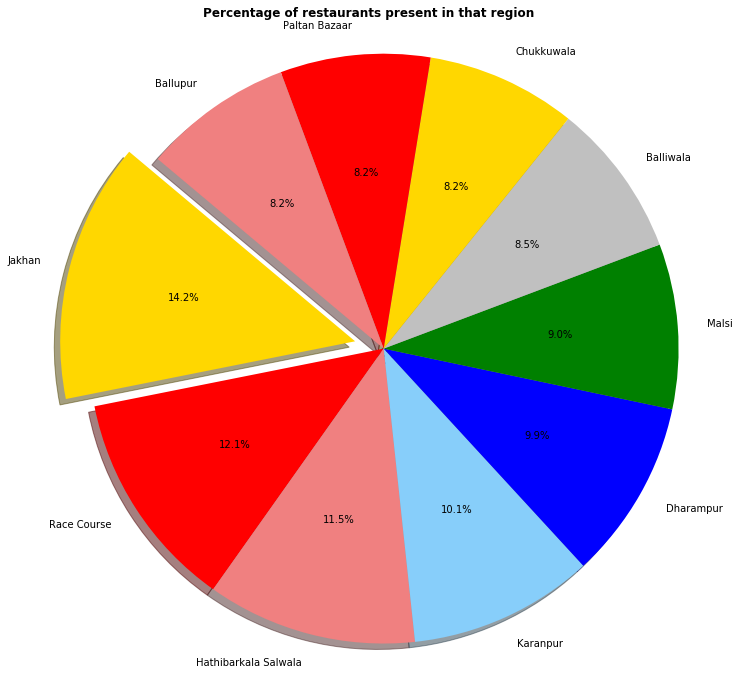

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      275
Good         209
Very Good     71
Excellent      5
Poor           4
Name: Rating_Types, dtype: int64

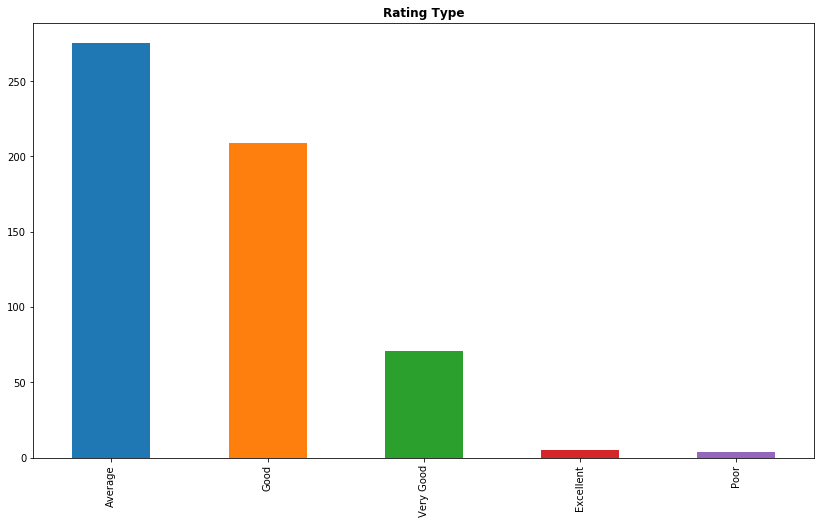

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       245
Casual Dining     140
Café               49
Bakery             29
none               18
Dessert Parlor     16
Dhaba              16
Fine Dining        13
Sweet Shop         10
Food Court          6
Name: Cuisine_Type, dtype: int64

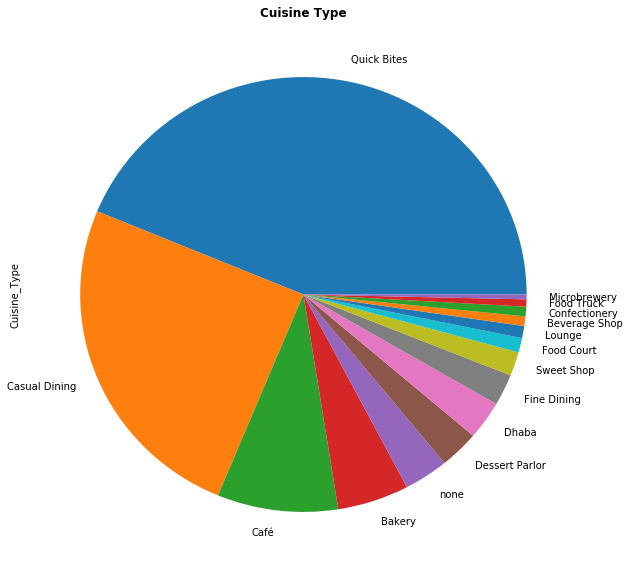

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.472727272727273


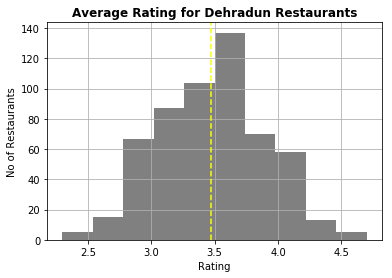

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Dehradun Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Dehradun is found to be around 3.4

# Top cuisines in Cuttack

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

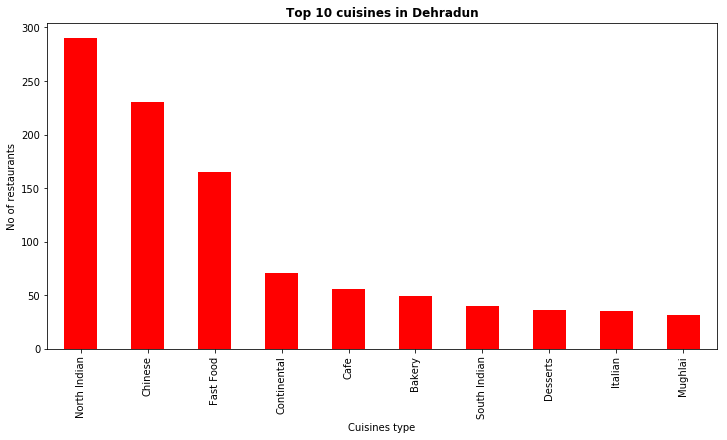

In [21]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Dehradun',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [22]:
data['Price'].value_counts()[:20]

500     73
300     69
200     60
250     57
400     49
350     36
800     34
600     31
1000    28
150     27
700     15
550     14
1200    13
450     11
100      8
1500     6
750      5
900      5
650      4
1100     3
Name: Price, dtype: int64

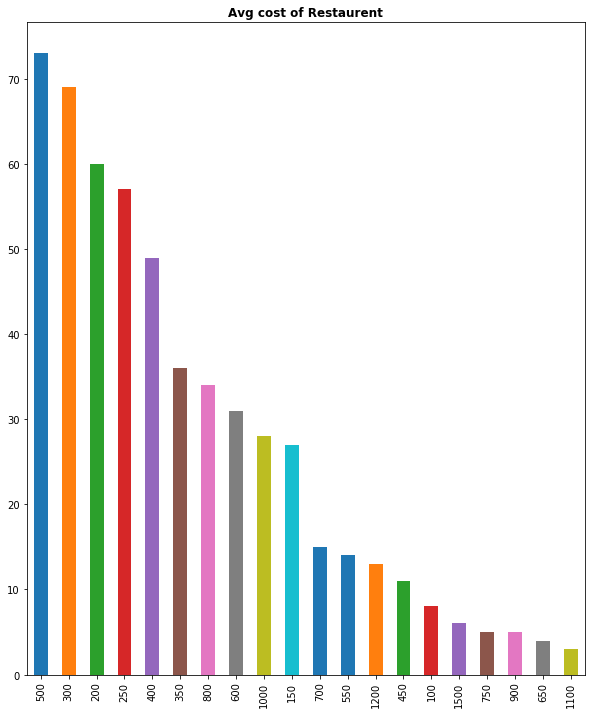

In [23]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [24]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

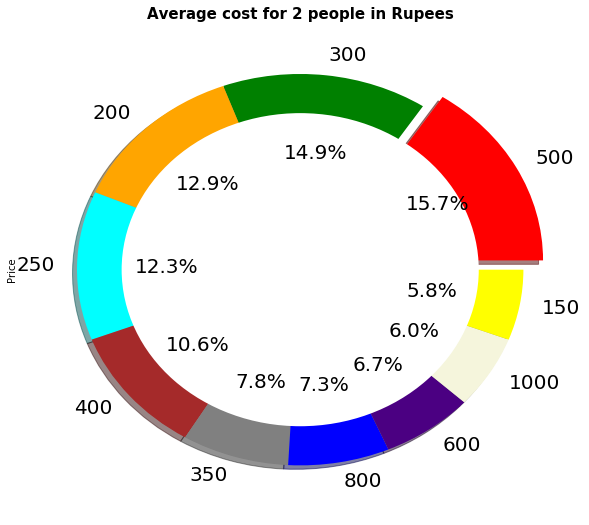

In [25]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 500